,filename,date
0,91159.jpg,1982
1,13628.jpg,1874
2,65966.jpg,1610
3,101264.jpg,1914
4,12536.jpg,1921
...,...,...
58349,7707.jpg,1920
58350,74872.jpg,1909
58351,100163.jpg,1975
58352,55664.jpg,1914


647


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dccc9fb70>]],
      dtype=object)

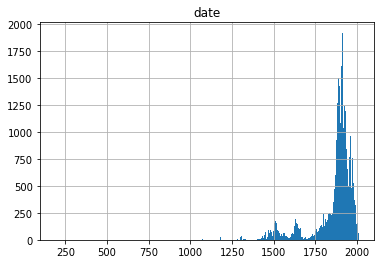

In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv('train_all_info.csv')
# df.drop(columns=['filename'], inplace=True)
display(df)
print(df['date'].nunique())
hist = df.hist(bins=df['date'].nunique())
hist

In [61]:
df.sort_values(by=['date'], inplace=True)
print(df)
length = len(df)
num_classes = 10
indicies = []
for i in range(1,num_classes):
    indicies.append(int(i * length / num_classes))
same_values = False
for i in range(num_classes - 2):
    if indicies[i] == indicies[i + 1]:
        same_values = True
        break
if (same_values == True):
    print("UH OH")
dfl = []
dates = []
for i in range(num_classes - 1):
    dfl.append(df.iloc[indicies[i]])
    dates.append(dfl[i]['date'])
print(indicies)
print(dates)
print(dates[1:-1])

        filename  date
30259  16458.jpg   187
31695  79075.jpg   904
13559  45720.jpg   930
6629   73492.jpg  1059
27023  28974.jpg  1072
...          ...   ...
56008  47856.jpg  2011
17621  70689.jpg  2011
4099   51168.jpg  2011
51289  66284.jpg  2012
13813  37201.jpg  2012

[58354 rows x 2 columns]
[5835, 11670, 17506, 23341, 29177, 35012, 40847, 46683, 52518]
[1645, 1836, 1877, 1891, 1903, 1913, 1926, 1944, 1966]
[1836, 1877, 1891, 1903, 1913, 1926, 1944]


In [62]:
df['class'] = np.zeros
date = dates[0]
df['class'].loc[df['date'] <= date] = 0

count = 1
previous_date = date
for date in dates[1:]:
    df['class'].loc[(df['date'] > previous_date) & (df['date'] <= date)] = count
    previous_date = date
    count += 1
    
date = dates[-1]
df['class'].loc[df['date'] > date] = count
df.drop(columns=['date'], inplace=True)
print(df)
#df['class'] = df['class'].astype(int)
df.to_csv('train_all_classes_10.csv', index = False, header=True)

        filename class
30259  16458.jpg     0
31695  79075.jpg     0
13559  45720.jpg     0
6629   73492.jpg     0
27023  28974.jpg     0
...          ...   ...
56008  47856.jpg     9
17621  70689.jpg     9
4099   51168.jpg     9
51289  66284.jpg     9
13813  37201.jpg     9

[58354 rows x 2 columns]


/home/james/.local/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
df.grouby(['class']).count()

AttributeError: 'DataFrame' object has no attribute 'grouby'